In [10]:
# Setup

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import warnings
from matplotlib.patches import Circle
import matplotlib.animation as animation

from utils.plot.utils import plot_cobweb, get_iterative_map_results

plt.rcParams["figure.figsize"] = (20, 20)

def saveFig(filename, chapter):
  plt.savefig(f"plots/chapter{chapter}/{filename}.png", facecolor="w")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Chapter 10 - One-Dimensional Maps

An **iterative map** has the form $x_{n + 1} = f(x_n)$, both the equation (sometimes called a **difference equation**) and the function are often referred to as **maps**. A point $x^*$ such that $f(x^*) = x^*$ is called a fixed point and can be either stable or unstable as with continuous differential equations. Maps can be analysed through **cobweb diagrams**

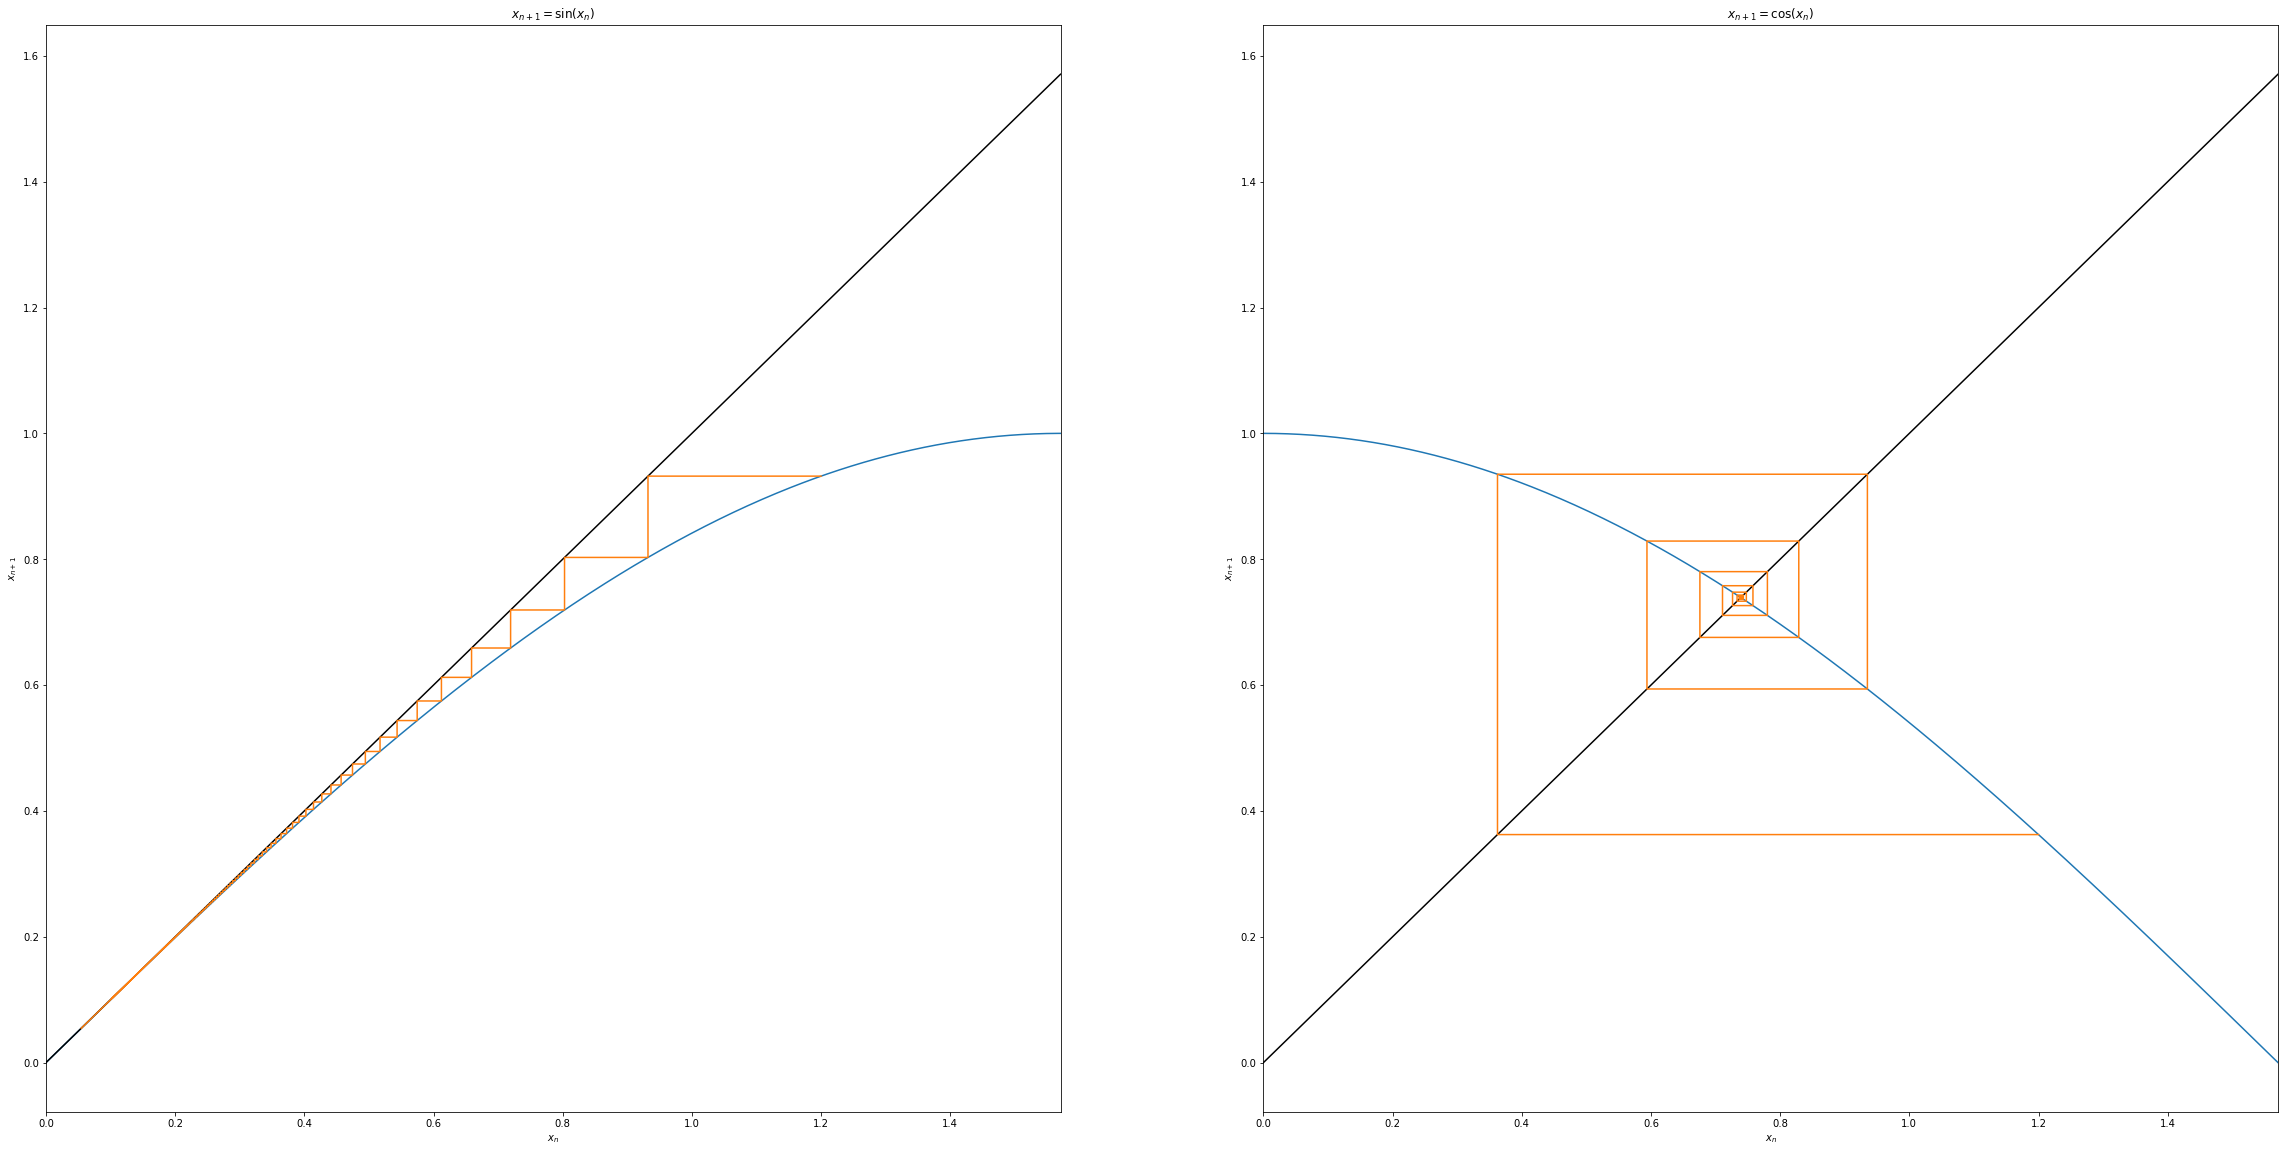

In [26]:
plt.figure(figsize=(40, 20))

plt.subplot(1, 2, 1)
plt.title("$x_{n+1} = \sin(x_n)$")
plt.xlabel("$x_n$")
plt.ylabel("$x_{n + 1}$")
plot_cobweb(lambda x: np.sin(x), [1.2], num_iterations=1000, x_range=[0, np.pi / 2])

plt.subplot(1, 2, 2)
plt.title("$x_{n+1} = \cos(x_n)$")
plt.xlabel("$x_n$")
plt.ylabel("$x_{n + 1}$")
plot_cobweb(lambda x: np.cos(x), [1.2], num_iterations=1000, x_range=[0, np.pi / 2])

The logistic function $x_{n + 1} = rx(1-x)$ with $r > 0$ (the discrete analog of the logistic function) displays chaotic behaviour for $3.4 < r < 4$. This can be analysed through an **orbit diagram** which involves plotting the values that the function takes for each value of $r$. For $3 < r < 3.4$ the points bounce back and forth between two points (after they settle down), this is called a **period-2 cycle**, as $r$ increases this then becomes period-4, then period-8..., eventually the period becomes infinite and chaotic motion occurs

Text(0.5, 0, '$r$')

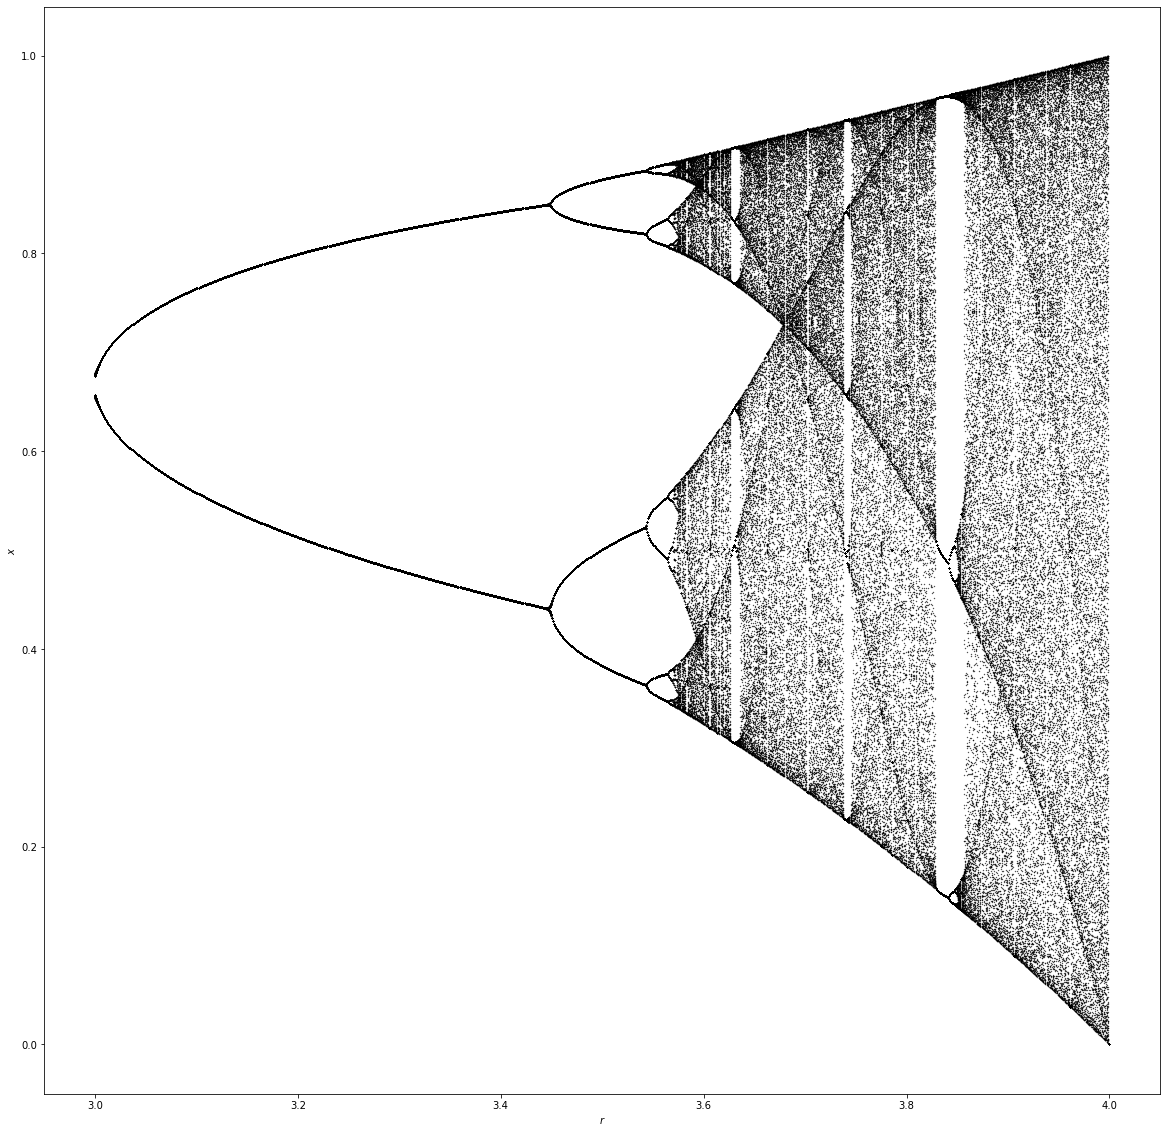

In [25]:
def logistic_map(r):
  return lambda x: r * x * (1 - x)

rs = np.linspace(3, 4, 1000)

for r in rs:
  # Remove the first 300 values to remove transient behaviour from the choice of initial point
  values = get_iterative_map_results(logistic_map(r), .5, 600)[300:]
  plt.scatter([r for _ in values], values, color="black", s=.1)

plt.ylabel("$x$")
plt.xlabel("$r$")